In [2]:
import os
import pandas as pd
import numpy as np
import re
import time
from datetime import datetime, date
from tabulate import tabulate #DF예쁘게 출력하기
import calendar
import seaborn as sns

# NumPy
- NumPy는 “Numerical Python“의 약자. 
- 대규모 다차원 배열과 행렬 연산에 필요한 다양한 함수를 제공. 파이썬에서 선형대수 기반의 프로그램을 쉽게 만들 수 있도록 지원하는 대표적인 패키지
<br>

- 많은 머신러닝 알고리즘이 넘파이 기반으로 작성돼 있으며, 알고리즘의 입출력 데이터를 넘파이 배열 타입으로 사용함
- 넘파이의 기본 데이터 타입은 ndarray. ndarray를 이용해 넘파이에서 다차원 배열을 쉽게 생성하고 다양한 연산 수행

## NumPy 특징

- 강력한 N 차원 배열 객체
- 정교한 broadcasting 기능
- C/C ++ 및 포트란 코드 통합 도구
- 유용한 선형 대수학, 푸리에 변환 및 난수 기능
- 푸리에 변환(Fourier transform, FT)은 시간이나 공간에 대한 함수를 시간 또는 공간 주파수 성분으로 분해하는 변환
- 범용적 데이터 처리에 사용 가능한 다차원 컨테이너

Numpy Documentation  

https://numpy.org/doc/1.21/index.html


In [5]:
z= np.arange(10)
print(f'{z.size*z.itemsize} bytes') #bytes 확인 #z.size(갯수), z.itemsize(?)

40 bytes


In [8]:
#numpy는 메모리를 효율적으로 관리 > 작동시간이 빠름
#numpy는 내부적으로 데이터를 (다른 내장 파이썬 객체와 구분된) 연속된 메모리 블록에 저장
my_arr = np.arange(1000000)
my_list = list(range(1000000))

In [10]:
#10번돌리는데 걸리는 시간 체크
%time for _ in range(10): my_array2 = my_arr*2
#'_'는 값을 무시하고 싶은 경우 사용(여기서는 인덱스 무시)

CPU times: total: 15.6 ms
Wall time: 16 ms


In [12]:
%time for _ in range(10): my_list2 = [x*2 for x in my_list]

CPU times: total: 625 ms
Wall time: 602 ms


- 배열 기본정보 함수

In [17]:
print(data.shape) #크기
print(data.dtype)
print(data.ndim) #차원

(2, 3)
float64
2


## 배열 연산

In [14]:
#np.random.randn : 정규분포를 이루는 값을 (m,n)배열로 추출
data = np.random.randn(2,3)
print(data, '\n')
print(data*10, '\n')
print(data + data)

[[-1.62304908  1.878251    0.57880681]
 [ 1.55978508  0.05432879  1.71044592]] 

[[-16.23049076  18.78250999   5.78806812]
 [ 15.59785085   0.54328785  17.10445921]] 

[[-3.24609815  3.756502    1.15761362]
 [ 3.11957017  0.10865757  3.42089184]]


## 배열 차원 변경
<img src='numpy차원.jpg' STYLE='width:500px;'>

In [22]:
#다차원 배열 만들기
data2 = [[1,2,3,4],[5,6,7,8]] # 현재는 list
#배열로 전환
arr2 = np.array(data2)

print(arr2)
print(arr2.ndim)
print(arr2.shape)

[[1 2 3 4]
 [5 6 7 8]]
2
(2, 4)


In [26]:
#1차원 배열로 3개의 데이터
arr1 = np.array([1,2,3])
print(arr1, arr1.ndim, arr1.shape, type(arr1))

[1 2 3] 1 (3,) <class 'numpy.ndarray'>


In [44]:
#배열 차원변경 - reshape
ar= np.arange(30)
ar1 = ar
ar2 = ar.reshape(5,6)
ar3 = ar.reshape(2,3,5)
ar2, ar3

(array([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23],
        [24, 25, 26, 27, 28, 29]]),
 array([[[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14]],
 
        [[15, 16, 17, 18, 19],
         [20, 21, 22, 23, 24],
         [25, 26, 27, 28, 29]]]))

In [63]:
#reshape(-1,-1)이용한 차원 변경 (?)
# 변경된 배열의 '-1' 위치의 차원은 "원래 배열의 길이와 남은 차원으로 부터 추정"
print(ar1,'\n')
ar2 = ar1.reshape(-1,15)
ar3 = ar1.reshape(-1,2,5)
print(ar2, ar2.ndim, ar2.shape, '\n')
print(ar3, ar3.ndim, ar3.shape)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29] 

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
 [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]] 2 (2, 15) 

[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]] 3 (3, 2, 5)


## 전치
- 전치 : np.transpose() / np.swapaxes

- 2차원 전치

In [152]:
#전치 - transpose / arr.T
print(arr.T,'\n')
print(arr.transpose(), '\n')
print(np.transpose(arr), '\n')

[[6 5 2 1 1]
 [4 9 6 2 7]
 [3 9 1 6 8]
 [9 6 5 6 8]
 [7 4 3 1 9]] 

[[6 5 2 1 1]
 [4 9 6 2 7]
 [3 9 1 6 8]
 [9 6 5 6 8]
 [7 4 3 1 9]] 

[[6 5 2 1 1]
 [4 9 6 2 7]
 [3 9 1 6 8]
 [9 6 5 6 8]
 [7 4 3 1 9]] 



In [153]:
#전치 - swapaxes
a = np.arange(6).reshape(2,3)
print(a,a.shape, '\n')
y= np.swapaxes(a, 0,1)
print(y,y.shape, '\n')

[[0 1 2]
 [3 4 5]] (2, 3) 

[[0 3]
 [1 4]
 [2 5]] (3, 2) 



- 3차원 전치

In [167]:
#3차원 전치 (0,1,2) : transpose()
a = np.arange(6).reshape(1,2,3)
print(a, a.shape)

#3차원과 2차원을 바꿔라. (2,1,3)
y = np.transpose(a,(1,0,2)) #차원의 자리 인덱스로 새로운 순서 표시
print(y, y.shape)

[[[0 1 2]
  [3 4 5]]] (1, 2, 3)
[[[0 1 2]]

 [[3 4 5]]] (2, 1, 3)


In [168]:
#3차원 전치 : swapaxes
z = np.swapaxes(a,0,1)
print(z, z.shape)

[[[0 1 2]]

 [[3 4 5]]] (2, 1, 3)


In [141]:
#기존 * 전치
np.dot(arr, arr.T) # 행렬 곱 # (mxn)*(nxp) 으로 닿는 차원이 같아야함

array([[191, 175, 105,  93, 193],
       [175, 239, 115, 117, 224],
       [105, 115,  75,  53, 119],
       [ 93, 117,  53,  78, 120],
       [193, 224, 119, 120, 259]])

In [147]:
np.matmul(arr, arr.T)

array([[191, 175, 105,  93, 193],
       [175, 239, 115, 117, 224],
       [105, 115,  75,  53, 119],
       [ 93, 117,  53,  78, 120],
       [193, 224, 119, 120, 259]])

## 배열 초기화
- Numpy는 원하는 shape로 배열을 설정하고, 각 요소를 특정 값으로 초기화하는 zeros, ones, full, eye함수 제공.
- 파라미터로 입력한 배열과 같은 shape의 배열을 만드는 zeros_like, ones_like, full_like 함수도 제공

In [29]:
print(np.zeros(10),'\n')
print(np.zeros((3,6)),'\n')
print(np.zeros((2,3,4))) #차원, 행, 열

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]] 

[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]


In [30]:
np.ones((2,3,4))

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]])

In [39]:
a= np.arange(10).reshape(2,5)
z= np.zeros_like(a) #a의 shape를 따라, zero행렬 생성
o= np.ones_like(a) #a의 shape를 따라, one행렬 생성
f= np.full_like(a, 5) ##a의 shape를 따라, 5로 채운 행렬 생성
z, o, f

(array([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]]),
 array([[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]]),
 array([[5, 5, 5, 5, 5],
        [5, 5, 5, 5, 5]]))

- np.zeros((8,8))을 이용하여 아래와 같이 출력하세요 <br>
```
array([[0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0]])
```

In [6]:
#방법1
a=np.zeros((8,8))
a[1::2,0::2] = 1
a[0::2,1::2] = 1
a

array([[0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.]])

In [10]:
#방법2 ) np.tile(반복할 arr, (m,n))
z = np.tile(np.array([[0,1],[1,0]]),(4,4))
z= np.tile(np.array([[0,1,0,1],[1,0,1,0]]),(4,2))
z

array([[0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0]])

# 행렬

- 행렬의 종류

https://math-development-geometry.tistory.com/52

- 정방행렬 : 행과 열의 수가 같은 행렬 (m=n)
- 대각행렬 : 주대각선 원소를 제외한 모든 원소들이 0인 정방행렬 (m=n), 항등행렬과 다르게 주대각선 원소에 1이외의 수가 가능
- 항등행렬은 행렬 곱셈 연산에 항등원으로 작용하는 행렬 (=단위행렬)
- 삼각행렬 : 주대각선 원소를 기준으로 위 또는 아래에 있는 성분이 모두 0인 정방행렬, 하삼각행렬(위 삼각형이 모두 0), 상삼각행렬(아래 삼각형이 모두 0)
- 영행렬은 모든 원소가 0인 행렬로 곱셈 연산에서 영원으로 작용하는 행렬
- 전치행렬은 주대각선 원소를 기준으로 행과 열을 바꿔주는 행렬, 주대각원소는 변하지 않음
- 직교행렬은 행렬 A의 역행렬이 A의 전치행렬이고 A의 전치행렬과 A 행렬을 곱하였을때 항등행렬이 나오는 행렬


In [64]:
#정방행렬
a = np.full((2,2),7)
a

array([[7, 7],
       [7, 7]])

In [68]:
#항등행렬, 단위행렬
arr= np.eye(3)
# arr=np.full((3,3),1) #이것과 달라요~
arr

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [73]:
#0 ~ 10을 균등하게 나누기
np.linspace(0,10) #default = 50개
np.linspace(0,10, 5)
np.linspace(0,10, 5, retstep=True) #retstep 구간 간격 값

(array([ 0. ,  2.5,  5. ,  7.5, 10. ]), 2.5)

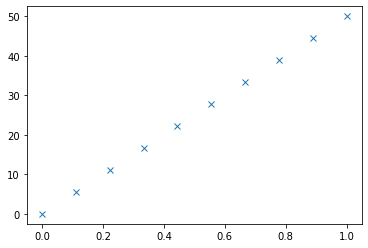

In [79]:
import matplotlib.pyplot as plt
x= np.linspace(0,1,10)
y = np.linspace(0,50,10)
plt.plot(x,y, 'x') #그래프에 표기할 문자

In [80]:
#미리보는 로그, 지수 함수
print(np.log10(1.25892541))
print(np.log10(10))
np.logspace(0.1,1,20)

0.0999999993810619
1.0


array([ 1.25892541,  1.40400425,  1.565802  ,  1.74624535,  1.94748304,
        2.1719114 ,  2.42220294,  2.70133812,  3.0126409 ,  3.35981829,
        3.74700446,  4.17881006,  4.66037703,  5.19743987,  5.79639395,
        6.46437163,  7.2093272 ,  8.04013161,  8.9666781 , 10.        ])

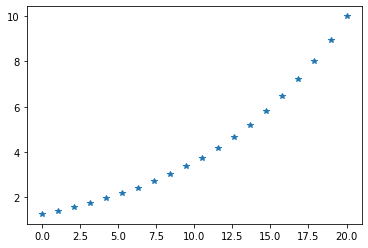

In [81]:
x = np.linspace(0,20,20)
y = np.logspace(0.1,1,20)
plt.plot(x,y,'*')

- 역행렬 <br>
: 어떤 행렬 A와 곱했을 때, 곱셈에 대한 항등원인 항등행렬 E가 나오는 행렬 <br>
: 역행렬을 갖는 행렬의 조건 (?)

In [158]:
np.random.seed(0)
mt1 = np.random.randint(1,4, size=(3,3))
print(mt1, '\n')
mt2 = np.linalg.inv(mt1) #역행렬 구하기
print(mt2, '\n')

np.dot(mt1, mt2) #항등행렬

[[1 2 1]
 [2 2 3]
 [1 3 1]] 

[[ 7. -1. -4.]
 [-1.  0.  1.]
 [-4.  1.  2.]] 



array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

# ndarray 데이터 형태

<img src= '데이터형태.jpg' STYLE='width:500px;'>

## 데이터 형태 지정 및 변경

In [90]:
#astype('type')
arr = np.array([1,2,3,4,5],)
print(arr.dtype)

float_arr = arr.astype('float')
print(float_arr.dtype)

int32
float64


In [95]:
numeric_string = np.array([1,2,3,4,5], dtype='S') #만들면서 type지정 가능
print(numeric_string, numeric_string.dtype) #'S'는 바이트 문자열 > (b=byte)

[b'1' b'2' b'3' b'4' b'5'] |S1


In [98]:
num = numeric_string.astype('int')
print(num, num.dtype)

[1 2 3 4 5] int32


# 뷰
뷰(view) : 넘파이의 ndarray(이하 배열)을 슬라이싱할 때 파이썬의 리스트(list)와 다르게 원본의 참조가 생성

numpy는 대용량 데이터 처리를 염두에 두고 대용량 데이터의 슬라이싱이 빈번하게 일어나는 복잡한 코드를 실행시키는데 있어서 복사가 남발되면 메모리 문제를 일으킬 소지가 많기 때문에 이렇게 설계

- 복사가 아니고 뷰(참조의 개념)이기 때문에 원본이 바뀌면 이 참조본도 따라서 바뀜
- 리스트의 슬라이싱에서는 복사본이 생성되는 것과는 다른 동작이기 때문에 주의
- 슬라이싱의 복사본을 생성하고 싶다면 copy() 속성을 이용

http://taewan.kim/post/numpy_cheat_sheet/


In [102]:
#copy
li = list(np.arange(1,11))
print(li, '\n')
li_slice = li[:5].copy()
print(li_slice, '\n')
li_slice[1] = 0
print(li_slice,'\n')
print(li)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 

[1, 2, 3, 4, 5] 

[1, 0, 3, 4, 5] 

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [106]:
#view - 원본을 변경
arr = np.arange(10)
print(arr,'\n')

li_slice = arr[5:8] #view
print(li_slice,'\n')
li_slice[:] = 12
print(li_slice,'\n')

print(arr)

[0 1 2 3 4 5 6 7 8 9] 

[5 6 7] 

[12 12 12] 

[ 0  1  2  3  4 12 12 12  8  9]


# 인덱싱
- 이전에 배운 pandas와 같음

# 변환

In [119]:
# arr > list
print(arr2d.tolist(), type(arr2d.tolist()))

[[1, 2, 3], [4, 5, 6], [7, 8, 9]] <class 'list'>


In [122]:
#boolean indexing
arr1d = np.arange(1, 10)
arr1 = arr1d[arr1d > 5]
print(arr1, '\n')

print(arr1d > 5) #bool값을 반환

[6 7 8 9] 

[False False False False False  True  True  True  True]


In [124]:
arr1d[5:]

array([6, 7, 8, 9])

In [129]:
#Q1. 1~100까지 정수에서 3의 배수인 것만을 출력(for문과 배열, 두가지방식)
#for
for i in range(1,101):
    if i%3 ==0:
        print(i,end=',')

#배열
arr = np.arange(1,101)
arr[arr%3 ==0]

3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63,66,69,72,75,78,81,84,87,90,93,96,99,

# numpy 제공 함수

- 사칙연산

In [12]:
arr = np.arange(1,10).reshape(3,3)
print(arr, '\n')
print(arr.cumsum(), '\n') #누적 덧셈
print(arr.cumsum(axis=0),'\n') #행 방향으로 더하기
print(arr.cumsum(axis=1)) #열 방향으로 더하기

[[1 2 3]
 [4 5 6]
 [7 8 9]] 

[ 1  3  6 10 15 21 28 36 45] 

[[ 1  2  3]
 [ 5  7  9]
 [12 15 18]] 

[[ 1  3  6]
 [ 4  9 15]
 [ 7 15 24]]


In [177]:
print(arr.prod(axis=1)) #열방향 곱하기

[  6 120 504]


In [178]:
print(arr.cumprod(axis=1)) #누적곱

[[  1   2   6]
 [  4  20 120]
 [  7  56 504]]


In [180]:
#나머지
v1 = np.array([15,30,45])
v2 = np.array([2,7,9])
print(np.mod(v1,v2), '\n')
print(np.remainder(v1,v2))

[1 2 0] 

[1 2 0]


In [181]:
#역수 구하기
value = np.array([0.85, 1.85, 1, 100])
print(np.reciprocal(value))

[1.17647059 0.54054054 1.         0.01      ]


In [184]:
#승수
v1 = np.array([2,10,15])
v2 = np.array([1,2,3])
print(np.power(v1,2),'\n')
print(np.power(v1,v2))

[  4 100 225] 

[   2  100 3375]


In [185]:
arr = np.random.randn(10) #정규분포
arr

array([-0.10321885,  0.4105985 ,  0.14404357,  1.45427351,  0.76103773,
        0.12167502,  0.44386323,  0.33367433,  1.49407907, -0.20515826])

In [187]:
(arr > 0).sum() #조건 만족하는 '원소 갯수' not '값의 합'

8

In [192]:
#any(), all() 메서드
bools= np.array([False, False, True, True])
print(bools.any()) #하나라도 참이면 참
bools.all() #전부다 참일 때, 참

True


False

- numpy.where 함수는 삼항식의 벡터화 버전

In [195]:
arr= np.random.randn(4,4)
print(arr,'\n')
np.where(arr > 0, 2, -2) #조건만족시, 2로 대체, 아니면 -2

[[-0.89546656  0.3869025  -0.51080514 -1.18063218]
 [-0.02818223  0.42833187  0.06651722  0.3024719 ]
 [-0.63432209 -0.36274117 -0.67246045 -0.35955316]
 [-0.81314628 -1.7262826   0.17742614 -0.40178094]] 



array([[-2,  2, -2, -2],
       [-2,  2,  2,  2],
       [-2, -2, -2, -2],
       [-2, -2,  2, -2]])

In [198]:
# Q. arr의 모든 양수를 2로 변경하세요.
np.where(arr>0,2,arr)

array([[-0.89546656,  2.        , -0.51080514, -1.18063218],
       [-0.02818223,  2.        ,  2.        ,  2.        ],
       [-0.63432209, -0.36274117, -0.67246045, -0.35955316],
       [-0.81314628, -1.7262826 ,  2.        , -0.40178094]])

- meshgrid함수 <br>
: 두개의 1차원 배열을 받아서 가능한 모든(x,y)짝으로 구성된 2차원 배열 반환

In [201]:
x = np.arange(1,4)
y = np.arange(1,4)
xs, ys = np.meshgrid(x,y) # ?
print(xs)
print(ys)

[[1 2 3]
 [1 2 3]
 [1 2 3]]
[[1 1 1]
 [2 2 2]
 [3 3 3]]


- arr.np.sort() : 복사본을 반환

In [208]:
arr = np.random.randint(1,100, size=10)
print(arr, '\n')
print(np.sort(arr),'\n') #따로 저장해줘야 함
print(arr, '\n') #기존것은 변경X

[84 34 33 71 86 32 14 72 57 25] 

[14 25 32 33 34 57 71 72 84 86] 

[84 34 33 71 86 32 14 72 57 25] 



In [216]:
#행렬의 sort
arr2d = np.array([[8,12],
                  [7,1]])

sort_arr2d_s0 = np.sort(arr2d, axis=0)
print(sort_arr2d_s0,'\n')

sort_arr2d_s1 = np.sort(arr2d, axis=1)
print(sort_arr2d_s1)

[[ 7  1]
 [ 8 12]] 

[[ 8 12]
 [ 1  7]]


- arr.ndarray.sort() : 원본에 반영

In [218]:
arr = np.random.randn(6)
print(arr, '\n')
arr.sort()
print(arr, '\n')

[ 1.86755896  0.90604466 -0.86122569  1.91006495 -0.26800337  0.8024564 ] 

[-0.86122569 -0.26800337  0.8024564   0.90604466  1.86755896  1.91006495] 



In [224]:
#n차원 정렬
arr = np.random.randn(5,3)
print(arr, '\n')
arr.sort(axis=1) #열방향 #default
print(arr, '\n') 
arr.sort(axis=0) #행방향
print(arr, '\n') 

[[ 0.26705087 -0.03928282 -1.1680935 ]
 [ 0.52327666 -0.17154633  0.77179055]
 [ 0.82350415  2.16323595  1.33652795]
 [-0.36918184 -0.23937918  1.0996596 ]
 [ 0.65526373  0.64013153 -1.61695604]] 

[[-1.1680935  -0.03928282  0.26705087]
 [-0.17154633  0.52327666  0.77179055]
 [ 0.82350415  1.33652795  2.16323595]
 [-0.36918184 -0.23937918  1.0996596 ]
 [-1.61695604  0.64013153  0.65526373]] 

[[-1.61695604 -0.23937918  0.26705087]
 [-1.1680935  -0.03928282  0.65526373]
 [-0.36918184  0.52327666  0.77179055]
 [-0.17154633  0.64013153  1.0996596 ]
 [ 0.82350415  1.33652795  2.16323595]] 



In [227]:
#정렬된 행렬의 인덱스를 반환 : 기존 원본 행렬의 원소에 대한 인덱스를 필요로 할 때
org_array = np.array([3,1,9,5])
sort_indices = np.argsort(org_array)
print(org_array, '\n')
print(sort_indices)

[3 1 9 5] 

[1 0 3 2]
